# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox 

In [0]:
!pip install turicreate

     |████████████████████████████████| 91.8MB 40kB/s 
     |████████████████████████████████| 327kB 55.4MB/s 
     |████████████████████████████████| 86.3MB 46kB/s 
     |████████████████████████████████| 3.4MB 61.9MB/s 
     |████████████████████████████████| 3.8MB 48.2MB/s 
     |████████████████████████████████| 450kB 53.0MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320850 sha256=ac7fcbde5d20abc252e853cf2f03fb0f2888b725e4cb1f8afe176b9f43baef0f
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=ee53b0cf2e398a82c2826dbd16d175d502a63542342da72e5c70596ada8982b5
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built resampy gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
 

## Reddit Networks
Using the [Reddit networks dataset](http://dynamics.cs.washington.edu/nobackup/reddit/) select the subreddit of your favorite  TV show. Using the data of the selected subreddit, 
answer the following questions:

[link text](https://)(A) Download Reddit networks dataset using Bash

In [0]:
# Change settings here
DATASET = 'reddit'
FILENAME = 'seinfeld.tar.gz'
DOWNLOAD = f'http://dynamics.cs.washington.edu/nobackup/reddit/{FILENAME}'

# clean main folders
!rm -r *
!ls

# Creating a dataset directory. 
# -p Will also create any intermediate directories that don't exist
!mkdir -p ./datasets/$DATASET/zip
!mkdir -p ./datasets/$DATASET/data
!ls ./datasets/$DATASET

# # download the dataset from SSA and unzip it
!wget $DOWNLOAD -O ./datasets/$DATASET/zip/$FILENAME
!ls ./datasets/$DATASET/zip
# ZIP
# !unzip {"./datasets/$DATASET/zip/$FILENAME"} -d {"./datasets/$DATASET/zip/"}
# tar.gz
!tar -xf ./datasets/$DATASET/zip/$FILENAME -C ./datasets/$DATASET/data
!rm -r ./datasets/$DATASET/zip/
# !tar -z -x -v -f "./datasets/$DATASET/zip/$FILENAME"
!ls ./datasets/$DATASET/data 

data  zip
--2020-04-21 07:04:43--  http://dynamics.cs.washington.edu/nobackup/reddit/seinfeld.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26222057 (25M) [application/x-gzip]
Saving to: ‘./datasets/reddit/zip/seinfeld.tar.gz’

./datasets/reddit/z 100%[===================>]  25.01M   721KB/s    in 19s     

2020-04-21 07:05:02 (1.33 MB/s) - ‘./datasets/reddit/zip/seinfeld.tar.gz’ saved [26222057/26222057]

seinfeld.tar.gz
metadata.json			       seinfeld.2009-02-13.2013-02-08.sgraph
seinfeld.2009-02-13.2009-03-13.sgraph  seinfeld.2009-02-13.2013-03-08.sgraph
seinfeld.2009-02-13.2009-04-10.sgraph  seinfeld.2009-02-13.2013-04-05.sgraph
seinfeld.2009-02-13.2009-05-08.sgraph  seinfeld.2009-02-13.2013-05-03.sgraph
seinfeld.2009-02-13.2009-06-05.sgraph  seinfeld.2009-02-13.

In [0]:
import turicreate as tc
FOLDER = 'seinfeld.2009-02-13.2016-10-31.sgraph'
FILE_PATH = f'./datasets/{DATASET}/data/{FOLDER}'
print(FILE_PATH)

sg = tc.load_sgraph(FILE_PATH)
print(sg)

./datasets/reddit/data/seinfeld.2009-02-13.2016-10-31.sgraph
SGraph({'num_edges': 45705, 'num_vertices': 17535})


**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

In [0]:
from turicreate import degree_counting

degree = tc.degree_counting.create(sg)
print(degree['graph'])
degree_counting_vertices = degree_counting.create(sg)['graph'].vertices[["__id",'total_degree']]
print(degree_counting_vertices)
df_vertices_sg = degree_counting_vertices.to_dataframe()
df_vertices_sg

SGraph({'num_edges': 45705, 'num_vertices': 17535})
+----------------------+--------------+
|         __id         | total_degree |
+----------------------+--------------+
|       HahnZahn       |      1       |
|        vifra         |      0       |
|   Some_Random_Nob    |      0       |
|     fuckyourteam     |      1       |
|    jetpacksforall    |      6       |
|     grossygross      |      0       |
| PM_Me_Annie_Drawings |      1       |
|     finnigan1671     |      1       |
|      fallenmonk      |      2       |
| YoshiandBirdofucked  |      1       |
+----------------------+--------------+
[17535 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


,__id,total_degree
0,HahnZahn,1
1,vifra,0
2,Some_Random_Nob,0
3,fuckyourteam,1
4,jetpacksforall,6
...,...,...
17530,youareagoon,3
17531,sozzler,1
17532,TorusX,5
17533,dstud6,0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


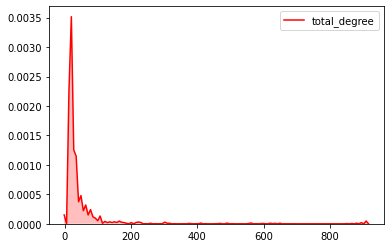

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

%matplotlib inline

# shade - If True, shade in the area under the KDE curve (or draw with filled contours when data is bivariate).
sns.kdeplot(df_vertices_sg['total_degree'], shade=True, color="r")

**Task 2:** Create a subgraph of the top-40 users according to a selected centrality algorithm. Draw the subgraph using circlular layout (15pt)

In [0]:
TOP_K = 40
PG_GRAPH_NAME = 'page_rank'
sg.vertices[PG_GRAPH_NAME] = tc.pagerank.create(sg)['graph'].vertices['pagerank']

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 15286.7               |

| 2         | 3677.72               |

| 3         | 1252.68               |

| 4         | 589.217               |

| 5         | 363.457               |

| 6         | 260.893               |

| 7         | 198.606               |

| 8         | 153.973               |

| 9         | 120.503               |

| 10        | 94.9654               |

| 11        | 75.035                |

| 12        | 59.4851               |

| 13        | 47.2645               |

| 14        | 37.6181               |

| 15        | 29.9843               |

| 16        | 23.9375               |

| 17        | 19.1385               |

| 18        | 15.3248               |

| 19        | 12.2899               |

| 20        | 9.86932               |

+-----------+-----------------------+

In [0]:
import networkx as nx

def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g


ng = sgraph2nxgraph(sg, is_directed=True, add_vertices_attributes=False, add_edges_attributes=False)
print("Networkx: %s" % nx.info(ng))
sx_sub = sg.vertices[['__id', PG_GRAPH_NAME]]
print(sx_sub)
sx_sub = sx_sub.sort(key_column_names=PG_GRAPH_NAME, ascending=False)
print(sx_sub)
sx_sub = sx_sub.head(TOP_K).to_dataframe()["__id"].values
print(sx_sub)
g = ng.subgraph(sx_sub)

Networkx: Name: 
Type: DiGraph
Number of nodes: 17535
Number of edges: 45705
Average in degree:   2.6065
Average out degree:   2.6065
+----------------------+---------------------+
|         __id         |      page_rank      |
+----------------------+---------------------+
|       HahnZahn       |         0.15        |
|        vifra         |         0.15        |
|   Some_Random_Nob    |         0.15        |
|     fuckyourteam     |  0.3164728743728074 |
|    jetpacksforall    |  0.5950789887698145 |
|     grossygross      |         0.15        |
| PM_Me_Annie_Drawings |         0.15        |
|     finnigan1671     |         0.15        |
|      fallenmonk      |         0.15        |
| YoshiandBirdofucked  | 0.22482291118690184 |
+----------------------+---------------------+
[17535 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.
+----------------------+--------------------+
|        

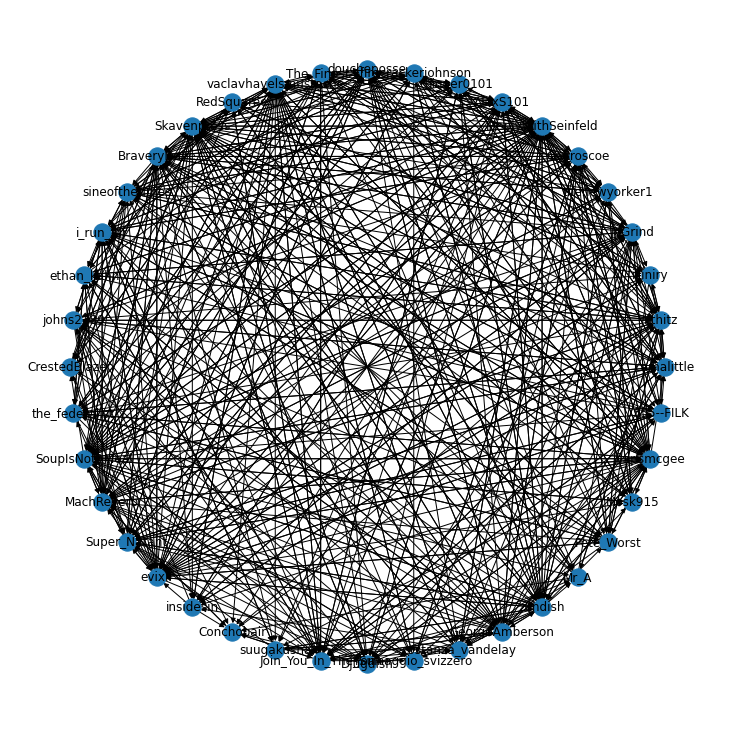

In [0]:
plt.figure(figsize=(10,10))
nx.draw_circular(g, with_labels=True)

**Task 3:** Calculate the degree, triangles, and average shortest path of each vertex in the graph (15pt)

**(A) Degree**

In [0]:
import pandas as pd

degree_ng = ng.degree()
df_degree = pd.DataFrame(degree_ng, columns=['Name', 'Degree'])
df_degree = df_degree.sort_values(by='Degree', ascending=False)
df_degree.set_index("Name", inplace=True)
df_degree

,Degree
Name,
IReplyWithSeinfeld,915
SoupIsNotAMeal,651
Skavenpress,631
zundish,621
nthitz,596
...,...
monster_pit,0
mysummergirl,0
stinkycheezwhiz,0


**(B) Triangles**

In [0]:
from turicreate import triangle_counting

# The triangle count of individual vertex characterizes the importance of the vertex in its neighborhood.
triangles_column = 'triangle_count'
triangle_c = triangle_counting.create(sg)
sg.vertices[triangles_column] = triangle_c['graph'].vertices[triangles_column]
triangles = sg.vertices[['__id', triangles_column]]
df_triangles = triangles.sort(triangles_column, ascending=False).to_dataframe()
df_triangles = df_triangles.rename(columns={"__id": "Name"})
df_triangles.set_index("Name", inplace=True)
df_triangles

Initializing vertex ids.

Removing duplicate (bidirectional) edges.

Counting triangles...

Finished in 0.443356 secs.

Total triangles in the graph : 32084

,triangle_count
Name,
IReplyWithSeinfeld,3857
Skavenpress,3029
SoupIsNotAMeal,2821
zundish,2651
flapsmcgee,2644
...,...
fasdflkjnadsfklj,0
blackychan1991,0
Wu-Tang_Killa_Bees,0


**(C) Average Shortest Path**

In [0]:
from turicreate import shortest_path
import statistics as st

vertices_sg_zero = list(df_vertices_sg[df_vertices_sg['total_degree']==0]["__id"])
shortest_paths = {'Name': [], 'Average_Shortest_Path': []}
full_list = set(sg.vertices["__id"])
for vertex  in full_list:
  vertex_shortest_paths = []
  if vertex not in vertices_sg_zero:
    sub_list = full_list - set([vertex ])
    for another_vertex in sub_list:
      try:
        shortest_path = nx.shortest_path(ng, vertex , another_vertex)
        vertex_shortest_paths.append(len(shortest_path)-2)
      except:
        pass
  shortest_paths['Name'].append(vertex)
  if len(vertex_shortest_paths) > 0:
    shortest_paths['Average_Shortest_Path'].append(st.mean(vertex_shortest_paths))
  else:
    shortest_paths['Average_Shortest_Path'].append(None)
df_shortest_paths = pd.DataFrame.from_dict(shortest_paths)
df_shortest_paths.set_index("Name", inplace=True)
df_shortest_paths

,Average_Shortest_Path
Name,
Southpaw_Style,NaN
ReturnAndReport,NaN
upboatupvote,3.393370
thorvaldnotnora,NaN
TheAdoringFan,2.304611
...,...
noryeguy,2.855631
DancinWithWolves,3.445848
mechesh,3.997516


**(D) All togather**

In [0]:
all_df = pd.concat([df_shortest_paths, df_triangles, df_degree], axis=1)
all_df = all_df.sort_values('Degree', ascending=False)
all_df

,Average_Shortest_Path,triangle_count,Degree
IReplyWithSeinfeld,1.471871,3857,915
SoupIsNotAMeal,1.601987,2821,651
Skavenpress,1.652305,3029,631
zundish,1.564842,2651,621
nthitz,1.760717,1899,596
...,...,...,...
fishbiscuit47,NaN,0,0
goshy900,NaN,0,0
madmads,NaN,0,0
humanityexists,NaN,0,0


**Task 4:** Use Cytoscape and Gephi to visualize the network, where each vertex size is correlates to its degree (15pt)

In [0]:
from google.colab import files

gephi_name_file = "network.gexf"
""" Write to GEXF """
# Use 1.2draft so you do not get a deprecated warning in Gelphi
d = nx.degree(ng)
# print(d)
d = [(d[node]+1) * 10 for node in ng.nodes()]
nx.info(ng)
nx.write_gexf(ng, gephi_name_file, version="1.2draft")
files.download(gephi_name_file) 

## **Gephi - ALL**
Note: It's hard to understand something looking at this figure. Please see the next figure.
[Click here to view full size](https://drive.google.com/uc?id=1OoUqWJwUKfWrRbnyB7SM1BiMEVMiT6ou)
![alt text](https://drive.google.com/uc?id=1OoUqWJwUKfWrRbnyB7SM1BiMEVMiT6ou)
## **Gephi - Degree > 50** 
[Click here to view full size](https://drive.google.com/uc?id=1B29YvPyd55iVa7Ef_MGBvlegyS5WKfxB)
![alt text](https://drive.google.com/uc?id=1B29YvPyd55iVa7Ef_MGBvlegyS5WKfxB)

In [0]:
from google.colab import files
cytoscape_name_file = "network.graphml"
nx.write_graphml(ng, cytoscape_name_file)
files.download(cytoscape_name_file) 

## **Cytoscape - ALL**
Note: It's hard to understand something looking at this figure. 
## **Cytoscape - Degree > 50**
[Click here to view full size](https://drive.google.com/open?id=1tXc1Guu_WSDqKaJv94kI7ejkBVlAV16x)
![alt text](https://drive.google.com/uc?id=1tXc1Guu_WSDqKaJv94kI7ejkBVlAV16x)

**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of edges in the subgraph (5pt)

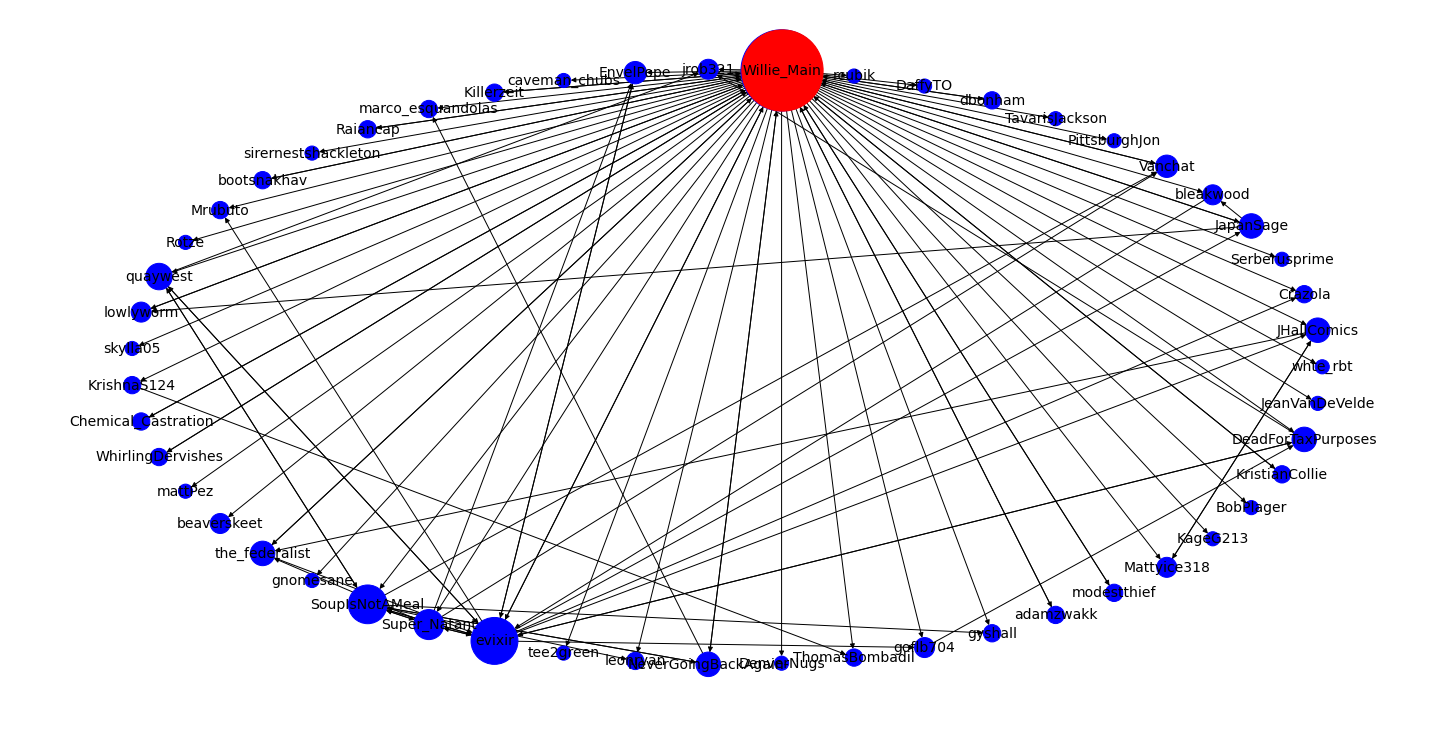

Number of edges in the subgraph: 107


In [0]:
def plot_subgraph_per_node(node_name):
    plt.figure(3, figsize=(20,10))
    ego_g = nx.ego_graph(ng, node_name)
    pos = nx.shell_layout(ego_g)
    d_ego = nx.degree(ego_g)
    d_ego = [(d_ego[n]+1) * 100 for n in ego_g.nodes()]
    nx.info(ego_g)
    node_list = list(ego_g.nodes())
    index_node = node_list.index(node_name)
    nx.draw(ego_g, pos, with_labels=True, node_size=d_ego, node_color='b', font_size=14)
    nx.draw_networkx_nodes(ego_g, pos, nodelist=[node_name], node_size=d_ego[index_node], node_color='r')
    plt.show()
    return ego_g

ego_g = plot_subgraph_per_node(node_name='Willie_Main')
print("Number of edges in the subgraph: {}".format(len(nx.edges(ego_g))))

**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges

(A) Download Chess networks dataset using Bash

In [0]:
# Change settings here
DATASET = 'chess'
FILENAME = 'fcis.tar.gz'
DOWNLOAD = f'http://dynamics.cs.washington.edu/nobackup/chess/{FILENAME}'

# clean main folders
!rm -r *
!ls

# Creating a dataset directory. 
# -p Will also create any intermediate directories that don't exist
!mkdir -p ./datasets/$DATASET/zip
!mkdir -p ./datasets/$DATASET/data
!ls ./datasets/$DATASET

# # download the dataset from SSA and unzip it
!wget $DOWNLOAD -O ./datasets/$DATASET/zip/$FILENAME
!ls ./datasets/$DATASET/zip
# ZIP
# !unzip {"./datasets/$DATASET/zip/$FILENAME"} -d {"./datasets/$DATASET/zip/"}
# tar.gz
!tar -xf ./datasets/$DATASET/zip/$FILENAME -C ./datasets/$DATASET/data
!rm -r ./datasets/$DATASET/zip/
# !tar -z -x -v -f "./datasets/$DATASET/zip/$FILENAME"
!ls ./datasets/$DATASET/data 

data  zip
--2020-04-23 11:46:33--  http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6852261483 (6.4G) [application/x-gzip]
Saving to: ‘./datasets/chess/zip/fcis.tar.gz’

./datasets/chess/zi 100%[===================>]   6.38G  21.7MB/s    in 4m 18s  

2020-04-23 11:50:51 (25.3 MB/s) - ‘./datasets/chess/zip/fcis.tar.gz’ saved [6852261483/6852261483]

fcis.tar.gz
FCIS


In [0]:
!ls ./datasets/$DATASET/data/FCIS

fcis_chess.interactions.csv	fcis_chess.vertices.csv
fcis_chess.interactions.sframe	fcis_chess.vertices.sframe


In [0]:
import turicreate as tc
FOLDER = 'FCIS'
FILE_PATH = f'./datasets/{DATASET}/data/{FOLDER}'
print(FILE_PATH)

chess_sf = tc.SGraph(vertices=tc.load_sframe(f'{FILE_PATH}/fcis_chess.vertices.sframe')[:1000],
                     edges=tc.load_sframe(f'{FILE_PATH}/fcis_chess.interactions.sframe')[:10000],
                     vid_field="v_id",
                     src_field="src_id",
                     dst_field="dst_id")
chess_sf

./datasets/chess/data/FCIS


SGraph({'num_edges': 10000, 'num_vertices': 3567})
Vertex Fields:['__id', 'mindate', 'maxdate']
Edge Fields:['__src_id', '__dst_id', 'datetime']

In [0]:
K = 10
chess = tc.pagerank.create(chess_sf)
print(chess)
chess = chess['pagerank']
chess_top=chess.topk('pagerank', K)
chess_top

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 2022.55               |

| 2         | 1208.96               |

| 3         | 825.778               |

| 4         | 619.78                |

| 5         | 479.311               |

| 6         | 378.096               |

| 7         | 302.1                 |

| 8         | 242.787               |

| 9         | 196.554               |

| 10        | 159.517               |

| 11        | 130.135               |

| 12        | 106.304               |

| 13        | 87.1395               |

| 14        | 71.522                |

| 15        | 58.8461               |

| 16        | 48.479                |

| 17        | 40.009                |

| 18        | 33.0515               |

| 19        | 27.3515               |

| 20        | 22.6515               |

+-----------+-----------------------+

Class                                    : PagerankModel

Graph
-----
num_edges                                : 10000
num_vertices                             : 3567

Results
-------
graph                                    : SGraph. See m['graph']
vertex pagerank                          : SFrame. See m.pagerank
change in last iteration (L1 norm)       : 22.6515

Settings
--------
probability of random jumps to any node in the graph : 0.15
convergence threshold (L1 norm)          : 0.01
maximum number of iterations             : 20

Metrics
-------
training time (secs)                     : 1.6655
number of iterations                     : 20

Queryable Fields
----------------
delta                                    : Change in pagerank for the last iteration in L1 norm
graph                                    : A new SGraph with the pagerank as a vertex property
max_iterations                           : The maximun number of iterations to run
num_iterations                        

__id,pagerank,delta
Wronskian,10.330886737420203,0.13818936705278517
pkch,8.617448516317403,0.13959828214195547
JagorCrafty,6.350693000544363,0.08369293110533782
mscp,6.248932791506753,0.0751194937277857
WhiteNoise,5.406531333304532,0.0050617688377450065
jaminski,5.29659763032857,0.005262634099162611
jadc,5.291129471518844,0.039623368780922874
SapphireII,5.190418241076982,0.09987667338550565
Drale,5.087100207665015,0.00023078637937068436
nitzan,5.049212129381439,0.012397079447792336


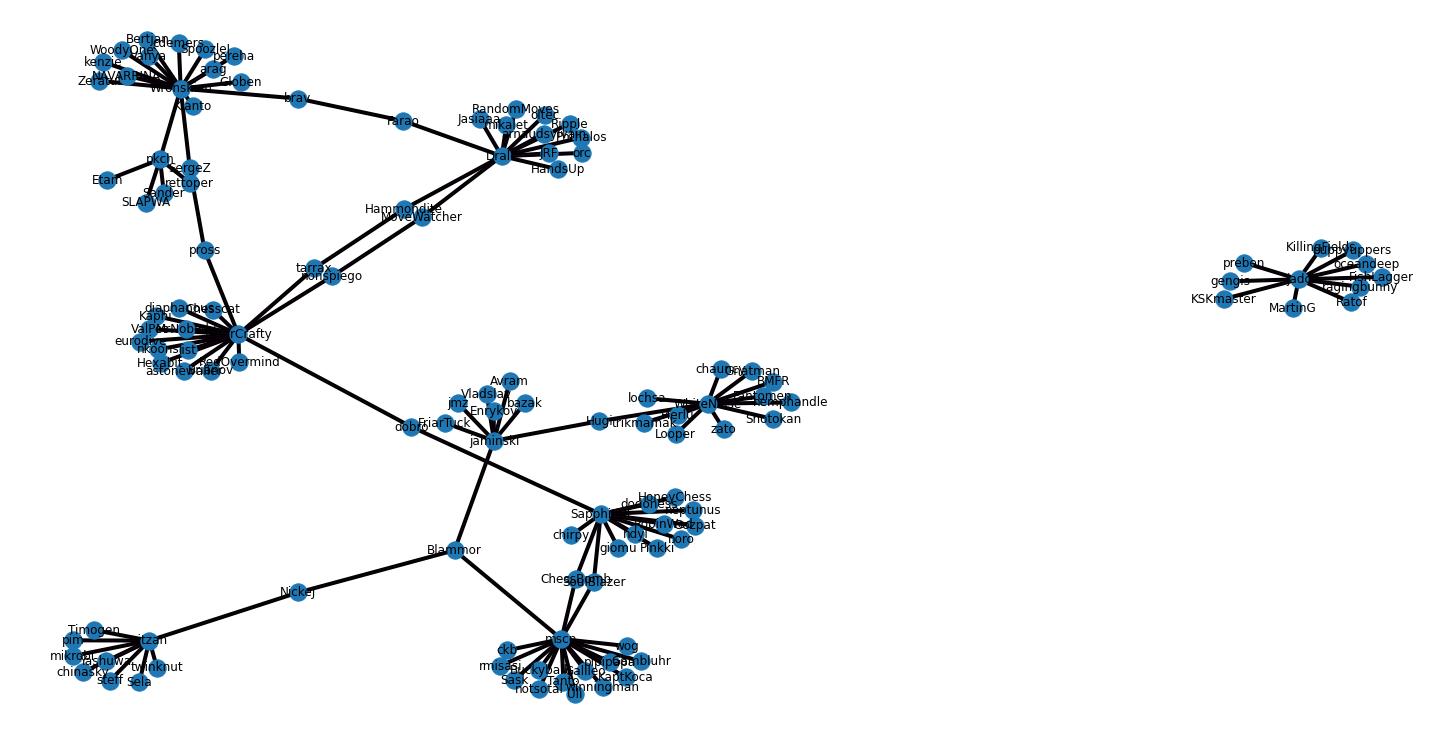

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g

sg_chess = chess_sf.get_neighborhood(chess_top['__id'])

plt.figure(figsize=(20,10))
g_neighborhood = sgraph2nxgraph(sg_chess, is_directed=False, add_vertices_attributes=True, add_edges_attributes=True)
pos = nx.spring_layout(g_neighborhood)
nx.draw(g_neighborhood, pos, width=4, edge_cmap=plt.cm.Blues, with_labels=True)

nx.draw_networkx_edges(g_neighborhood, pos, alpha=0.3, width=0.3, edge_color='m')

**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

In [0]:
!mkdir /root/.kaggle/
# Installing the Kaggle package
!pip install kaggle 

import numpy as np
import pandas as pd
import json
import os
#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"", "key":""}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
# searching for the dataset
DATASET_NAME = 'lotr'
!rm -r ./datasets/$DATASET_NAME/
!mkdir -p ./datasets/$DATASET_NAME/data
!mkdir -p ./datasets/$DATASET_NAME/zip
!mkdir -p ./datasets/$DATASET_NAME/sql
!ls datasets/$DATASET_NAME/data

!kaggle datasets list -s $DATASET_NAME
# download the dataset from Kaggle and unzip it
!kaggle datasets download paultimothymooney/lord-of-the-rings-data -p ./datasets/$DATASET_NAME/zip
!unzip ./datasets/$DATASET_NAME/zip/*.zip -d ./datasets/$DATASET_NAME/data
!ls ./datasets/$DATASET_NAME/zip/
!ls ./datasets/$DATASET_NAME/data/
!ls ./datasets/$DATASET_NAME/sql/

rm: cannot remove './datasets/lotr/': No such file or directory
ref                                       title                    size  lastUpdated          downloadCount  
----------------------------------------  ----------------------  -----  -------------------  -------------  
paultimothymooney/lord-of-the-rings-data  Lord of the Rings Data   88KB  2018-09-04 00:22:35           1019  
mokosan/lord-of-the-rings-character-data  Lord Of The Rings Data  931KB  2017-12-12 02:37:11            809  
leipzig/phylotree                         PhyloTree Data          804KB  2018-04-05 00:38:44            446  
shobhit1998/yolotry                       yolotry                 316MB  2019-04-18 09:40:54              9  
  0% 0.00/88.0k [00:00<?, ?B/s]
100% 88.0k/88.0k [00:00<00:00, 40.9MB/s]
Archive:  ./datasets/lotr/zip/lord-of-the-rings-data.zip
  inflating: ./datasets/lotr/data/lotr_characters.csv  
  inflating: ./datasets/lotr/data/lotr_scripts.csv  
lord-of-the-rings-data.zip
lotr_chara

In [0]:
import re 
import numpy as np
import pandas as pd
import networkx as nx

df = pd.read_csv(f"./datasets/{DATASET_NAME}/data/lotr_characters.csv")
df = df.fillna('')
df

,birth,death,gender,hair,height,name,race,realm,spouse
0,,,Female,,,Adanel,Men,,Belemir
1,TA 2978,"February 26 ,3019",Male,Dark (book) Light brown (movie),,Boromir,Men,,
2,,"March ,3019",Male,,,Lagduf,Orcs,,
3,TA 280,TA 515,Male,,,Tarcil,Men,Arnor,Unnamed wife
4,,,Male,,,Fire-drake of Gondolin,Dragon,,
...,...,...,...,...,...,...,...,...,...
906,"Mid ,First Age",FA 495,Female,,,Aerin,Men,,Brodda
907,,,,,,Aerandir,,,
908,"YT during the ,Noontide of Valinor",FA 455,Male,Golden,,Aegnor,Elves,,"Loved ,Andreth but remained unmarried"
909,TA 2917,TA 3010,Male,,,Adrahil II,Men,,Unnamed wife


In [0]:
import matplotlib.pyplot as plt
import networkx as nx
import re

def normailze_spouse(s):
    if s in {'','Unnamed wife', 'None' }:
        return None
    if "Loved" not in s:
        return s
    
    r = re.compile("Loved ,(\w+)")
    l = r.findall(s)
    if len(l) > 0:
        return l[0]

g = df.groupby(['race', 'gender'])
g.size().to_frame (name='counts').sort_values('counts', ascending=0)
df['norm_spouse'] = df['spouse'].apply(lambda s: normailze_spouse(s))
links_df = df[['name', 'norm_spouse', 'race', 'gender']]
links_df = links_df.dropna()
links_df2 = pd.merge(links_df, links_df, left_on="name", right_on="norm_spouse")
links_df2 = links_df2[["name_x","race_x", "gender_x", "name_y", "race_y", "gender_y"]]
g = nx.Graph()

for i, r in links_df2.iterrows():
    g.add_node(r['name_x'],race=r["race_x"], gender=r["gender_x"])
    g.add_node(r['name_y'],race=r["race_y"], gender=r["gender_y"])
    edges_list = [(r['name_x'], r['name_y']) for i, r in links_df2.iterrows()]

g.add_edges_from(edges_list)

node_colors = []
# add node color by gender
for node in g.nodes(data=True):
    if node[1]['gender'] == "Male":
        node_colors.append('blue')
    elif node[1]['gender'] == "Female":
        node_colors.append('red')
    else:
        node_colors.append('green')


# plt.figure(3,figsize=(14,14))
# nx.draw_spring(g, with_labels=True, node_color=node_colors)

In [0]:
import networkx as nx
from networkx.readwrite import json_graph
import json
from google.colab import files
%matplotlib inline

nx.info(g)
cytoscape_name_file = "network_lotr.graphml"
nx.write_graphml(g, cytoscape_name_file)
files.download(cytoscape_name_file) 

[Click here to view full size](https://drive.google.com/open?id=1ExJYnLjHKxK5JLatt8TyeJMZ_PdNWyi7)
![alt text](https://drive.google.com/uc?id=1ExJYnLjHKxK5JLatt8TyeJMZ_PdNWyi7)

### Additional Questions for Practice

**Task 1:** Visualize the distribution of the network's strongly and weakly connected components.

**Task 2:** Using Cytoscape, visualize the network's maximal strongly connected component (or part of it)

**Task 3:** Draw a subgraph of all the vertices that have at least one reciprocal link, i.e., all the vertices where there is at least one vertex _u_ so that both links (u,v) and (v,u) exists

**Task 4:** Split the network into communities, and find the second most central vertex in each community
    

**Task 5:** Find the top-10 most central players at [The Free Internet Chess Server](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz).
    Visualize part of the network.
    
**Note:** The network has 429,747,476 edges